<a href="https://colab.research.google.com/github/byerHu/tf_practice/blob/master/tf_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
input_1 = tf.constant(3.0)

In [0]:
input_2 = tf.constant(2.0)

In [0]:
input_3 = tf.constant(5.0)

In [0]:
add = tf.add(input_2,input_3)

In [0]:
mul = tf.multiply(input_1,add)

In [0]:
with tf.Session() as sess:
  res = sess.run([mul,add])
  print(res)

[21.0, 7.0]


In [0]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

output = tf.multiply(a,b)

with tf.Session() as sess:
  res = sess.run(output,feed_dict={a:[7.0],b:[3.0]})
  print(res)

[21.]


In [0]:
import tensorflow as tf
import numpy as np

In [0]:
# 使用numpy产生１００个随机点
x_data = np.random.rand(100)
y_data = x_data*0.1 + 0.2

In [0]:
# 构造一个线性模型
k = tf.Variable(0.)
b = tf.Variable(0.)
y = k*x_data + b



In [0]:
# 定义二次损失
loss = tf.reduce_mean(tf.square(y_data-y))

# 定义优化器
optimizer = tf.train.GradientDescentOptimizer(0.2)

# 最小化损失
train = optimizer.minimize(loss)

# 初始化
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  for step in range(201):
    sess.run(train)
    if step % 20 == 0:
      print(step,sess.run([k,b]))

0 [0.04762692, 0.0980451]
20 [0.09864993, 0.20065446]
40 [0.099232875, 0.20037198]
60 [0.0995641, 0.20021138]
80 [0.09975231, 0.2001201]
100 [0.09985925, 0.20006825]
120 [0.09992003, 0.20003878]
140 [0.09995455, 0.20002204]
160 [0.09997418, 0.20001252]
180 [0.09998533, 0.20000711]
200 [0.099991664, 0.20000404]


In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## 生成样本点

In [0]:
# 使用numpy生成均匀分布的２００个点 [:,np.newaxis]转换为200行一列
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]

# 生成一些随机值产生干扰项
noise = np.random.normal(0,0.02,x_data.shape)

y_data = np.square(x_data) + noise

In [0]:
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

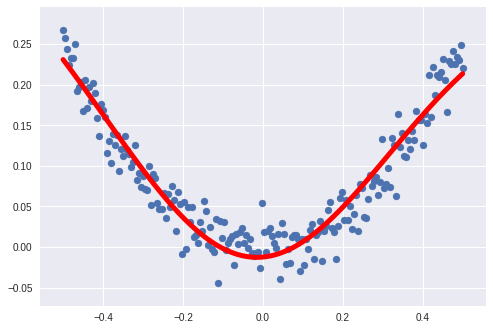

In [0]:
# 定义神经网络中间层
weight_L1 = tf.Variable(tf.random_normal([1,10]))
bias_L1 = tf.Variable(tf.zeros([1,10]))
result_L1 = tf.matmul(x,weight_L1) + bias_L1
output_L1 = tf.nn.tanh(result_L1)

# 定义输出层
weight_L2 = tf.Variable(tf.random_normal([10,1]))
bias_L2 = tf.Variable(tf.zeros([1,1]))
result_L2 = tf.matmul(output_L1,weight_L2) + bias_L2
predict = tf.nn.tanh(result_L2)

# 定义loss
loss = tf.reduce_mean(tf.square(y-predict))
# 定义优化器
optimizer = tf.train.GradientDescentOptimizer(0.1)
# 最小化损失
train = optimizer.minimize(loss)

with tf.Session() as sess:
  # 初始化
  sess.run(tf.global_variables_initializer())
  # 开始迭代
  for _ in range(2000):
    sess.run(train,feed_dict={x:x_data,y:y_data})
  
  # 获取预测值
  predict_value = sess.run(predict,feed_dict={x:x_data})
  
  # 画图
  plt.figure()
  
  plt.scatter(x_data,y_data)
  
  plt.plot(x_data,predict_value,'r-',lw=5)
  
  plt.show()

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
# 载入数据

mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
# 定义两个占位符
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

# 定义一个批次
batch_size = 50

# 计算有多少个批次
n_batch = mnist.train.num_examples // batch_size

# 定义神经网络
w_1 = tf.Variable(tf.zeros([784,10]))
b_1 = tf.Variable(tf.zeros([10]))

predict = tf.nn.softmax(tf.matmul(x,w_1)+b_1)

# 定义损失
# loss = tf.reduce_mean(tf.square(y-predict))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=predict))

# 定义优化器
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 初始化
init = tf.global_variables_initializer()
# 结果存放在一个布尔列表中
correct_predict = tf.equal(tf.arg_max(y,1),tf.argmax(predict,1))

# 计算准确率
accuracy = tf.reduce_mean(tf.cast(correct_predict,tf.float32))

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(21):
    for batch in range(n_batch):
      batch_xs,batch_ys = mnist.train.next_batch(batch_size)
      sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
    
    acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
    
    print("Iter "+str(epoch)+" Testing Accuracy："+str(acc))

Iter 0 Testing Accuracy：0.8245
Iter 1 Testing Accuracy：0.8887
Iter 2 Testing Accuracy：0.9011
Iter 3 Testing Accuracy：0.9049
Iter 4 Testing Accuracy：0.908
Iter 5 Testing Accuracy：0.9095
Iter 6 Testing Accuracy：0.9115
Iter 7 Testing Accuracy：0.9135
Iter 8 Testing Accuracy：0.9153
Iter 9 Testing Accuracy：0.9155
Iter 10 Testing Accuracy：0.9174
Iter 11 Testing Accuracy：0.918
Iter 12 Testing Accuracy：0.919
Iter 13 Testing Accuracy：0.9198
Iter 14 Testing Accuracy：0.9194
Iter 15 Testing Accuracy：0.9218
Iter 16 Testing Accuracy：0.9206
Iter 17 Testing Accuracy：0.921
Iter 18 Testing Accuracy：0.9215
Iter 19 Testing Accuracy：0.9218
Iter 20 Testing Accuracy：0.9216


In [0]:
# 定义两个占位符
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)

# 定义一个批次
batch_size = 100

# 计算有多少个批次
n_batch = mnist.train.num_examples // batch_size

# 定义神经网络
w_1 = tf.Variable(tf.truncated_normal([784,2000],stddev=0.1))
b_1 = tf.Variable(tf.zeros([2000])+0.1)
L_1 = tf.nn.tanh(tf.matmul(x,w_1)+b_1)
L_1_drop = tf.nn.dropout(L_1,keep_prob)

w_2 = tf.Variable(tf.truncated_normal([2000,2000],stddev=0.1))
b_2 = tf.Variable(tf.zeros([2000])+0.1)
L_2 = tf.nn.tanh(tf.matmul(L_1_drop,w_2)+b_2)
L_2_drop = tf.nn.dropout(L_2,keep_prob)

w_3 = tf.Variable(tf.truncated_normal([2000,1000],stddev=0.1))
b_3 = tf.Variable(tf.zeros([1000])+0.1)
L_3 = tf.nn.tanh(tf.matmul(L_2_drop,w_3)+b_3)
L_3_drop = tf.nn.dropout(L_3,keep_prob)

w_4 = tf.Variable(tf.truncated_normal([1000,10],stddev=0.1))
b_4 = tf.Variable(tf.zeros([10])+0.1)
predict = tf.nn.softmax(tf.matmul(L_3_drop,w_4)+b_4)

# 定义损失
# loss = tf.reduce_mean(tf.square(y-predict))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=predict))

# 定义优化器
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 初始化
init = tf.global_variables_initializer()
# 结果存放在一个布尔列表中
correct_predict = tf.equal(tf.arg_max(y,1),tf.argmax(predict,1))

# 计算准确率
accuracy = tf.reduce_mean(tf.cast(correct_predict,tf.float32))

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(21):
    for batch in range(n_batch):
      batch_xs,batch_ys = mnist.train.next_batch(batch_size)
      sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:1.0})
    
    test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
    train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1.0})
    print("Iter "+str(epoch)+" Testing Accuracy："+str(test_acc) + ",Training accuracy: "+str(train_acc))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Iter 0 Testing Accuracy：0.9399,Training accuracy: 0.94945455
Iter 1 Testing Accuracy：0.9534,Training accuracy: 0.9676909
Iter 2 Testing Accuracy：0.9589,Training accuracy: 0.9753636
Iter 3 Testing Accuracy：0.9615,Training accuracy: 0.97981817
Iter 4 Testing Accuracy：0.9634,Training accuracy: 0.9829636
Iter 5 Testing Accuracy：0.9641,Training accuracy: 0.985
Iter 6 Testing Accuracy：0.9642,Training accuracy: 0.9864182
Iter 7 Testing Accuracy：0.9658,Training accuracy: 0.98745453
Iter 8 Testing Accuracy：0.9658,Training accuracy: 0.9885091
Iter 9 Testing Accuracy：0.9655,Training accuracy: 0.9891091
Iter 10 Testing Accuracy：0.9675,Training accuracy: 0.9896909
Iter 11 Testing Accuracy：0.9673,Training accuracy: 0.99005455
Iter 12 Testing Accuracy：0.967,Training accuracy: 0.9903455
Iter 13 Testing Accuracy：0.9674,Training accuracy: 0.99076366
Iter 14 Testing Accuracy：0.9676,Training 

In [0]:
# 定义两个占位符
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)

# 定义一个批次
batch_size = 100

# 计算有多少个批次
n_batch = mnist.train.num_examples // batch_size

# 定义神经网络
w_1 = tf.Variable(tf.truncated_normal([784,2000],stddev=0.1))
b_1 = tf.Variable(tf.zeros([2000])+0.1)
L_1 = tf.nn.tanh(tf.matmul(x,w_1)+b_1)
L_1_drop = tf.nn.dropout(L_1,keep_prob)

w_2 = tf.Variable(tf.truncated_normal([2000,2000],stddev=0.1))
b_2 = tf.Variable(tf.zeros([2000])+0.1)
L_2 = tf.nn.tanh(tf.matmul(L_1_drop,w_2)+b_2)
L_2_drop = tf.nn.dropout(L_2,keep_prob)

w_3 = tf.Variable(tf.truncated_normal([2000,1000],stddev=0.1))
b_3 = tf.Variable(tf.zeros([1000])+0.1)
L_3 = tf.nn.tanh(tf.matmul(L_2_drop,w_3)+b_3)
L_3_drop = tf.nn.dropout(L_3,keep_prob)

w_4 = tf.Variable(tf.truncated_normal([1000,10],stddev=0.1))
b_4 = tf.Variable(tf.zeros([10])+0.1)
predict = tf.nn.softmax(tf.matmul(L_3_drop,w_4)+b_4)

# 定义损失
# loss = tf.reduce_mean(tf.square(y-predict))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=predict))

# 定义优化器
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 初始化
init = tf.global_variables_initializer()
# 结果存放在一个布尔列表中
correct_predict = tf.equal(tf.arg_max(y,1),tf.argmax(predict,1))

# 计算准确率
accuracy = tf.reduce_mean(tf.cast(correct_predict,tf.float32))

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(21):
    for batch in range(n_batch):
      batch_xs,batch_ys = mnist.train.next_batch(batch_size)
      sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.7})
    
    test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:0.7})
    train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:0.7})
    print("Iter "+str(epoch)+" Testing Accuracy："+str(test_acc) + ",Training accuracy: "+str(train_acc))

Iter 0 Testing Accuracy：0.8572,Training accuracy: 0.84685457
Iter 1 Testing Accuracy：0.8867,Training accuracy: 0.88134545
Iter 2 Testing Accuracy：0.8999,Training accuracy: 0.8936
Iter 3 Testing Accuracy：0.9099,Training accuracy: 0.9050364
Iter 4 Testing Accuracy：0.9157,Training accuracy: 0.91130906
Iter 5 Testing Accuracy：0.9168,Training accuracy: 0.91583633
Iter 6 Testing Accuracy：0.9204,Training accuracy: 0.91874546
Iter 7 Testing Accuracy：0.924,Training accuracy: 0.92196363
Iter 8 Testing Accuracy：0.9258,Training accuracy: 0.9265091
Iter 9 Testing Accuracy：0.9287,Training accuracy: 0.9282
Iter 10 Testing Accuracy：0.9311,Training accuracy: 0.9310182
Iter 11 Testing Accuracy：0.9311,Training accuracy: 0.93407273
Iter 12 Testing Accuracy：0.9311,Training accuracy: 0.93529093
Iter 13 Testing Accuracy：0.9359,Training accuracy: 0.9363273
Iter 14 Testing Accuracy：0.9364,Training accuracy: 0.9391091
Iter 15 Testing Accuracy：0.9352,Training accuracy: 0.93834543
Iter 16 Testing Accuracy：0.939,T

In [0]:
# 定义两个占位符
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)

# 定义一个批次
batch_size = 100

# 计算有多少个批次
n_batch = mnist.train.num_examples // batch_size

# 定义神经网络
w_1 = tf.Variable(tf.truncated_normal([784,2000],stddev=0.1))
b_1 = tf.Variable(tf.zeros([2000])+0.1)
L_1 = tf.nn.tanh(tf.matmul(x,w_1)+b_1)
L_1_drop = tf.nn.dropout(L_1,keep_prob)

w_2 = tf.Variable(tf.truncated_normal([2000,2000],stddev=0.1))
b_2 = tf.Variable(tf.zeros([2000])+0.1)
L_2 = tf.nn.tanh(tf.matmul(L_1_drop,w_2)+b_2)
L_2_drop = tf.nn.dropout(L_2,keep_prob)

w_3 = tf.Variable(tf.truncated_normal([2000,1000],stddev=0.1))
b_3 = tf.Variable(tf.zeros([1000])+0.1)
L_3 = tf.nn.tanh(tf.matmul(L_2_drop,w_3)+b_3)
L_3_drop = tf.nn.dropout(L_3,keep_prob)

w_4 = tf.Variable(tf.truncated_normal([1000,10],stddev=0.1))
b_4 = tf.Variable(tf.zeros([10])+0.1)
predict = tf.nn.softmax(tf.matmul(L_3_drop,w_4)+b_4)

# 定义损失
# loss = tf.reduce_mean(tf.square(y-predict))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=predict))

# 定义优化器
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 初始化
init = tf.global_variables_initializer()
# 结果存放在一个布尔列表中
correct_predict = tf.equal(tf.arg_max(y,1),tf.argmax(predict,1))

# 计算准确率
accuracy = tf.reduce_mean(tf.cast(correct_predict,tf.float32))

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(31):
    for batch in range(n_batch):
      batch_xs,batch_ys = mnist.train.next_batch(batch_size)
      sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.7})
    
    test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
    train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1.0})
    print("Iter "+str(epoch)+" Testing Accuracy："+str(test_acc) + ",Training accuracy: "+str(train_acc))

Iter 0 Testing Accuracy：0.8999,Training accuracy: 0.89583635
Iter 1 Testing Accuracy：0.9192,Training accuracy: 0.9154182
Iter 2 Testing Accuracy：0.9288,Training accuracy: 0.9252
Iter 3 Testing Accuracy：0.9323,Training accuracy: 0.93052727
Iter 4 Testing Accuracy：0.9357,Training accuracy: 0.9345273
Iter 5 Testing Accuracy：0.9396,Training accuracy: 0.9382182
Iter 6 Testing Accuracy：0.941,Training accuracy: 0.9405091
Iter 7 Testing Accuracy：0.9436,Training accuracy: 0.9438182
Iter 8 Testing Accuracy：0.9455,Training accuracy: 0.94650906
Iter 9 Testing Accuracy：0.9472,Training accuracy: 0.94754547
Iter 10 Testing Accuracy：0.9467,Training accuracy: 0.94927275
Iter 11 Testing Accuracy：0.9496,Training accuracy: 0.95158184
Iter 12 Testing Accuracy：0.9507,Training accuracy: 0.9533273
Iter 13 Testing Accuracy：0.952,Training accuracy: 0.95467275
Iter 14 Testing Accuracy：0.9521,Training accuracy: 0.95567274
Iter 15 Testing Accuracy：0.9542,Training accuracy: 0.9577091
Iter 16 Testing Accuracy：0.9541

In [0]:
%time L = [i**2 for i in range(10000000)]

CPU times: user 2.87 s, sys: 157 ms, total: 3.03 s
Wall time: 3.03 s


In [0]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

# 载入mnist数据集
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

# 定义两个占位符
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

# 定义一个批次
batch_size = 50

# 计算有多少个批次
n_batch = mnist.train.num_examples // batch_size

# 定义神经网络
w_1 = tf.Variable(tf.zeros([784,10]))
b_1 = tf.Variable(tf.zeros([10]))

predict = tf.nn.softmax(tf.matmul(x,w_1)+b_1)

# 定义损失
# loss = tf.reduce_mean(tf.square(y-predict))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=predict))

# 定义优化器
# train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
train_step = tf.train.AdamOptimizer(1e-2).minimize(loss)
# 初始化
init = tf.global_variables_initializer()
# 结果存放在一个布尔列表中
correct_predict = tf.equal(tf.arg_max(y,1),tf.argmax(predict,1))

# 计算准确率
accuracy = tf.reduce_mean(tf.cast(correct_predict,tf.float32))

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(21):
    for batch in range(n_batch):
      batch_xs,batch_ys = mnist.train.next_batch(batch_size)
      sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
    
    acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
    
    print("Iter "+str(epoch)+" Testing Accuracy："+str(acc))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Iter 0 Testing Accuracy：0.9191
Iter 1 Testing Accuracy：0.9228
Iter 2 Testing Accuracy：0.9297
Iter 3 Testing Accuracy：0.9275
Iter 4 Testing Accuracy：0.9262
Iter 5 Testing Accuracy：0.9254
Iter 6 Testing Accuracy：0.9312
Iter 7 Testing Accuracy：0.9233
Iter 8 Testing Accuracy：0.9289
Iter 9 Testing Accuracy：0.9303
Iter 10 Testing Accuracy：0.9313
Iter 11 Testing Accuracy：0.9301
Iter 12 Testing Accuracy：0.93
Iter 13 Testing Accuracy：0.9292
Iter 14 Testing Accuracy：0.9295
Iter 15 Testing Accuracy：0.9311
Iter 16 Testing Accuracy：0.9314
Iter 17 Testing Accuracy：0.9302
Iter 18 Testing Accuracy：0.93
Iter 19 Testing Accuracy：0.9326
Iter 20 Testing Accuracy：0.9292


In [0]:
# 定义两个占位符
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)

# 定义一个批次
batch_size = 100

# 计算有多少个批次
n_batch = mnist.train.num_examples // batch_size

# 定义学习率
lr = tf.Variable(0.001,tf.float32)

# 定义神经网络
w_1 = tf.Variable(tf.truncated_normal([784,500],stddev=0.1))
b_1 = tf.Variable(tf.zeros([500])+0.1)
L_1 = tf.nn.tanh(tf.matmul(x,w_1)+b_1)
L_1_drop = tf.nn.dropout(L_1,keep_prob)

w_2 = tf.Variable(tf.truncated_normal([500,500],stddev=0.1))
b_2 = tf.Variable(tf.zeros([500])+0.1)
L_2 = tf.nn.tanh(tf.matmul(L_1_drop,w_2)+b_2)
L_2_drop = tf.nn.dropout(L_2,keep_prob)

w_3 = tf.Variable(tf.truncated_normal([500,300],stddev=0.1))
b_3 = tf.Variable(tf.zeros([300])+0.1)
L_3 = tf.nn.tanh(tf.matmul(L_2_drop,w_3)+b_3)
L_3_drop = tf.nn.dropout(L_3,keep_prob)

w_4 = tf.Variable(tf.truncated_normal([300,10],stddev=0.1))
b_4 = tf.Variable(tf.zeros([10])+0.1)
predict = tf.nn.softmax(tf.matmul(L_3_drop,w_4)+b_4)

# 定义损失
# loss = tf.reduce_mean(tf.square(y-predict))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=predict))

# 定义优化器
# train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
train_step = tf.train.AdamOptimizer(lr).minimize(loss)
# 初始化
init = tf.global_variables_initializer()
# 结果存放在一个布尔列表中
correct_predict = tf.equal(tf.arg_max(y,1),tf.argmax(predict,1))

# 计算准确率
accuracy = tf.reduce_mean(tf.cast(correct_predict,tf.float32))

with tf.Session() as sess:
  sess.run(init)
  
  for epoch in range(51):
    sess.run(tf.assign(lr,0.001 *(0.95**epoch)))
    for batch in range(n_batch):
      batch_xs,batch_ys = mnist.train.next_batch(batch_size)
      sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:1.0})
    
    learing_rate = sess.run(lr)
    test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
    train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1.0})
    print("Iter "+str(epoch)+" Testing Accuracy："+str(test_acc) + ",Training accuracy: "+str(train_acc) + " learning rate:"+str(learing_rate))

Iter 0 Testing Accuracy：0.9568,Training accuracy: 0.9606909 learning rate:0.001
Iter 1 Testing Accuracy：0.9614,Training accuracy: 0.9696 learning rate:0.00095
Iter 2 Testing Accuracy：0.964,Training accuracy: 0.9756727 learning rate:0.0009025
Iter 3 Testing Accuracy：0.9696,Training accuracy: 0.97998184 learning rate:0.000857375
Iter 4 Testing Accuracy：0.9707,Training accuracy: 0.98358184 learning rate:0.00081450626
Iter 5 Testing Accuracy：0.973,Training accuracy: 0.9861636 learning rate:0.0007737809
Iter 6 Testing Accuracy：0.9708,Training accuracy: 0.9872909 learning rate:0.0007350919
Iter 7 Testing Accuracy：0.977,Training accuracy: 0.98954546 learning rate:0.0006983373
Iter 8 Testing Accuracy：0.9787,Training accuracy: 0.99136364 learning rate:0.0006634204
Iter 9 Testing Accuracy：0.9769,Training accuracy: 0.99143636 learning rate:0.0006302494
Iter 10 Testing Accuracy：0.9797,Training accuracy: 0.99372727 learning rate:0.0005987369
Iter 11 Testing Accuracy：0.9775,Training accuracy: 0.9937